<a href="https://colab.research.google.com/github/alvitay/Auto-mpg-Analysis/blob/main/Auto_mpg_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [ ]:
# Mouts the drive from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Auto_mpg/auto-mpg (1).csv")

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [ ]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [ ]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [ ]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column.
- First, we need to **replace the ? with np.nan**.

In [ ]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [ ]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

### **Question 1:**
- **Check the summary statistics of the data (use the describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [ ]:
# Write your code here

data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**

- There are a total of 398 observations.
- The weight has a high range from 1613 lbs to 5140 lbs. The average weight is approximately 2970 lbs.
- The engine displacement also has a fairly large range from 68 cu. inches to 455 cu. inches.  The average engine displacement is 193 cu. inches.
- The cylinders has the smallest range out of all the variables in this dataset.  This makes sense since vehicles really do not vary much in regards to the number of cylinders they contain. The max number of cylinders is 8 and the min is 3.  This low variability in number of cylinders is also reflected in the small standard deviation of 1.701004.
- Vehicles in this dataset get at least 9 mpg  and a max of 46.6 mpg.  The average mpg the vintage vehicles get is 23.514573.
- The horsepower of the vehicles in this dataset has a fairly large range from 46 to 230.  The average horsepower is approximately 104.
- The time it takes these vehicles to accelerate from 0 to 60 mph in seconds shows a fairly low variability with a standard deviation of 2.757689.  This is expected as vehicles made around the same time would have similar acceleration times.
- Lastly, the average model year is 76 with the oldest vehicles made in 70 and the newest made in 82.

### **Let's check the distribution and outliers for each column in the data**

### **Question 2:**
- **Create histograms to check the distribution of all the variables (use .hist() attribute) (2 Marks)**
- **Create boxplots to visualize the outliers for all the variables (use sns.boxplot()) (2 Marks)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


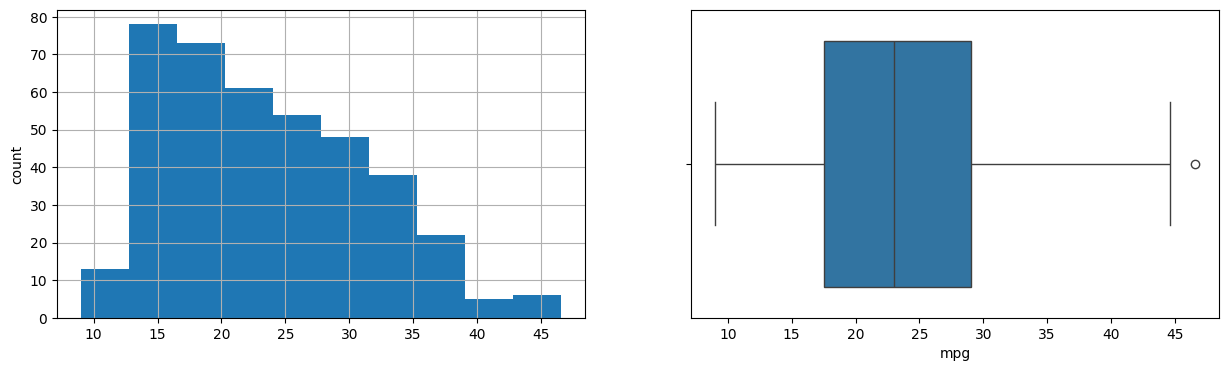

cylinders
Skew : 0.53


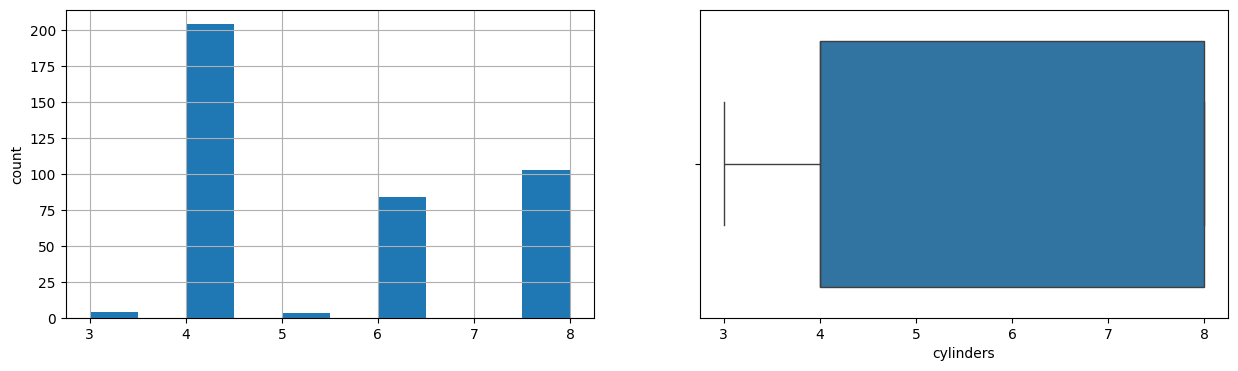

displacement
Skew : 0.72


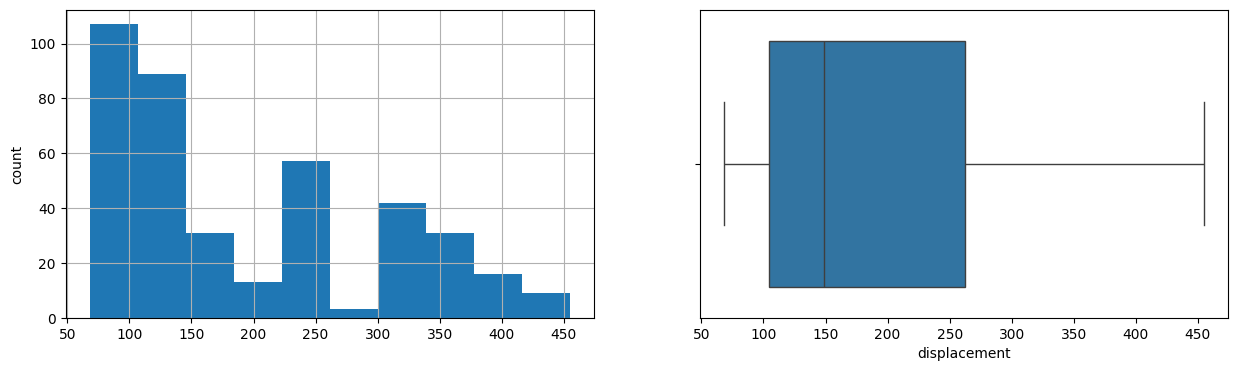

horsepower
Skew : 1.11


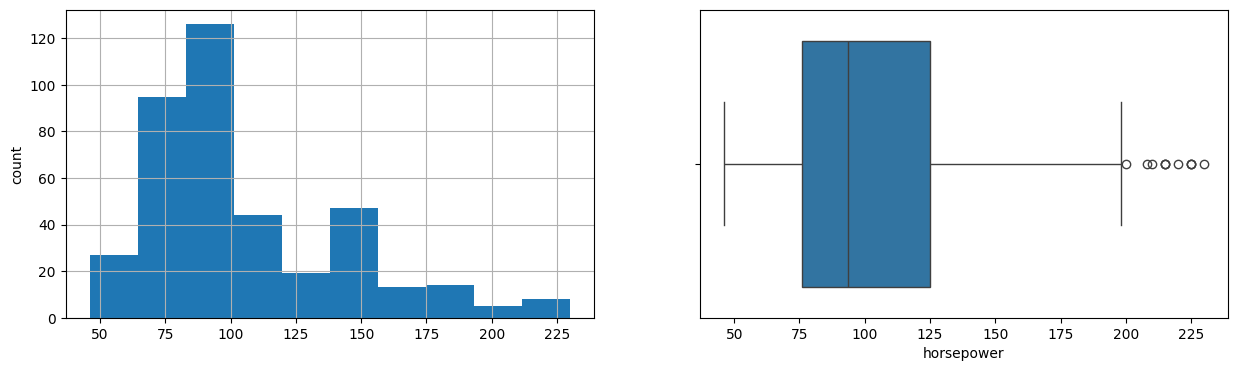

weight
Skew : 0.53


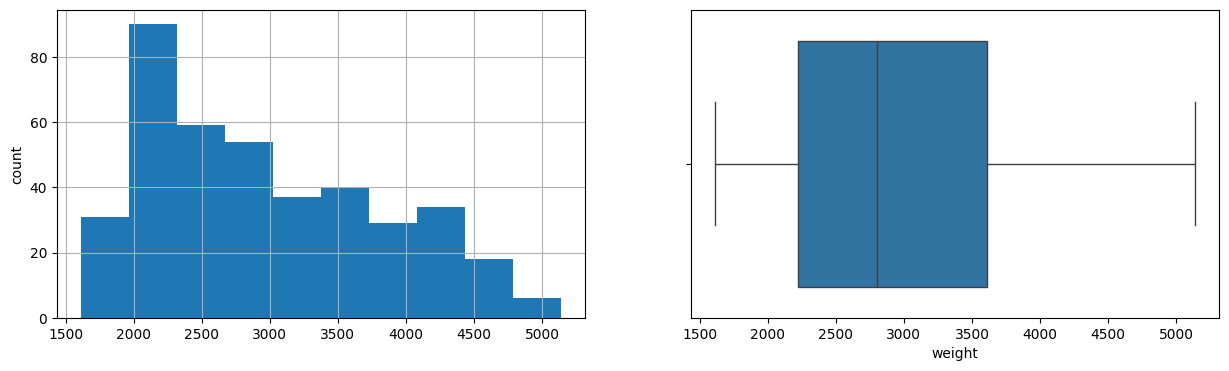

acceleration
Skew : 0.28


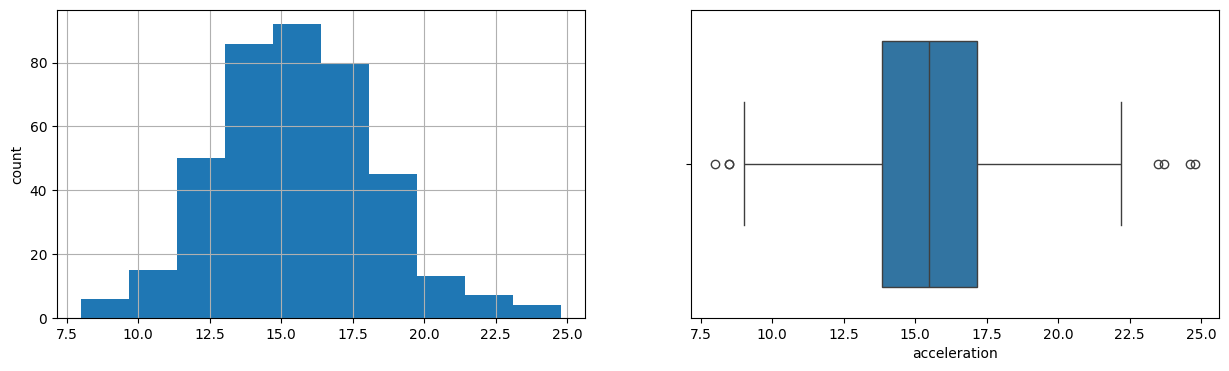

model year
Skew : 0.01


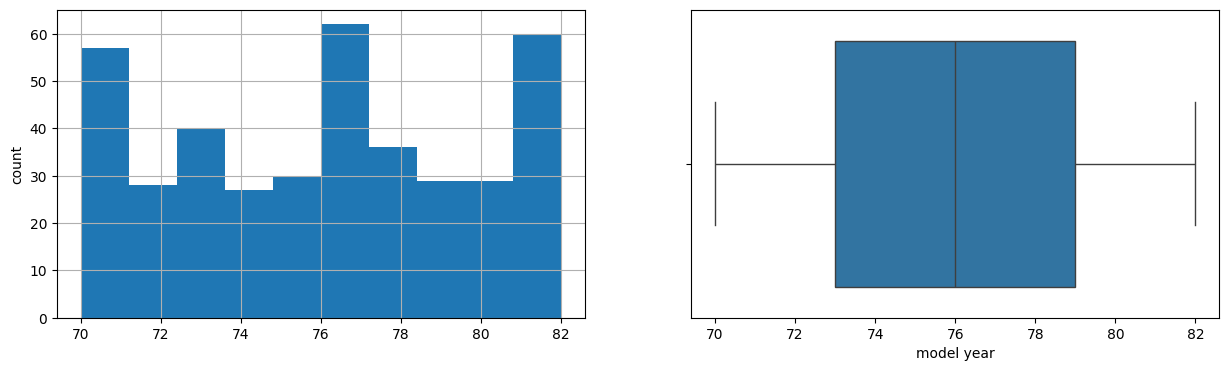

In [ ]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist()

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

**Observations:**

- The variables have either a right-skewed distribution or close to symmetrical distribution.  The distribution for model year is almost perfectly symmetrical with a skew of 0.01.
- The distribution for acceleration is relatively less skewed with outliers to both the right and left ends.
- Mpg, cylinders, displacement, and weight are all right-skewed distributions and have similar skews.
- Lastly, horsepower is the most right-skewed distribution and has outliers to the right end.

### **Checking the correlation**

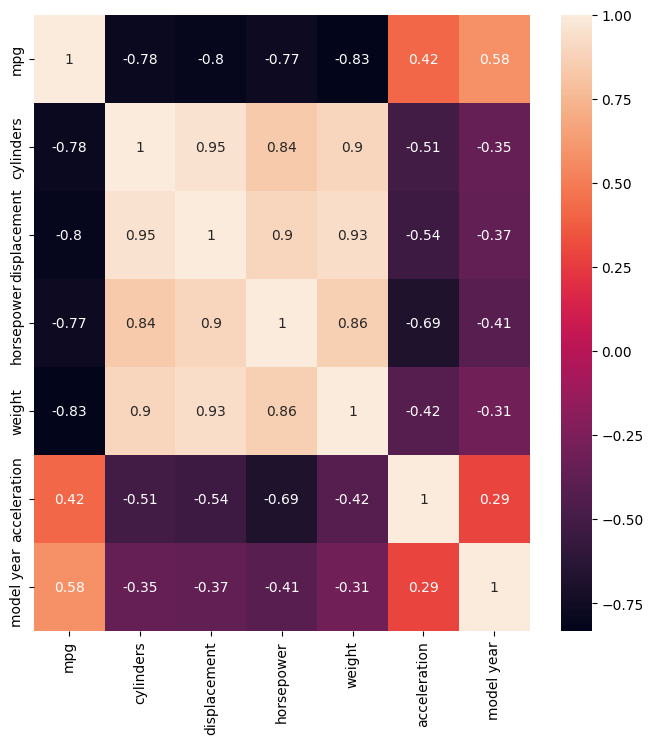

In [ ]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [ ]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

### **Question 3:**

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data (2 Marks)**
- **Write your observations on the variance explained by the principal components (2 Marks)**

In [ ]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components=n, random_state = 1)  # Apply the PCA algorithm with random_state = 1

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))   # Fit and transform the pca function on scaled data

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

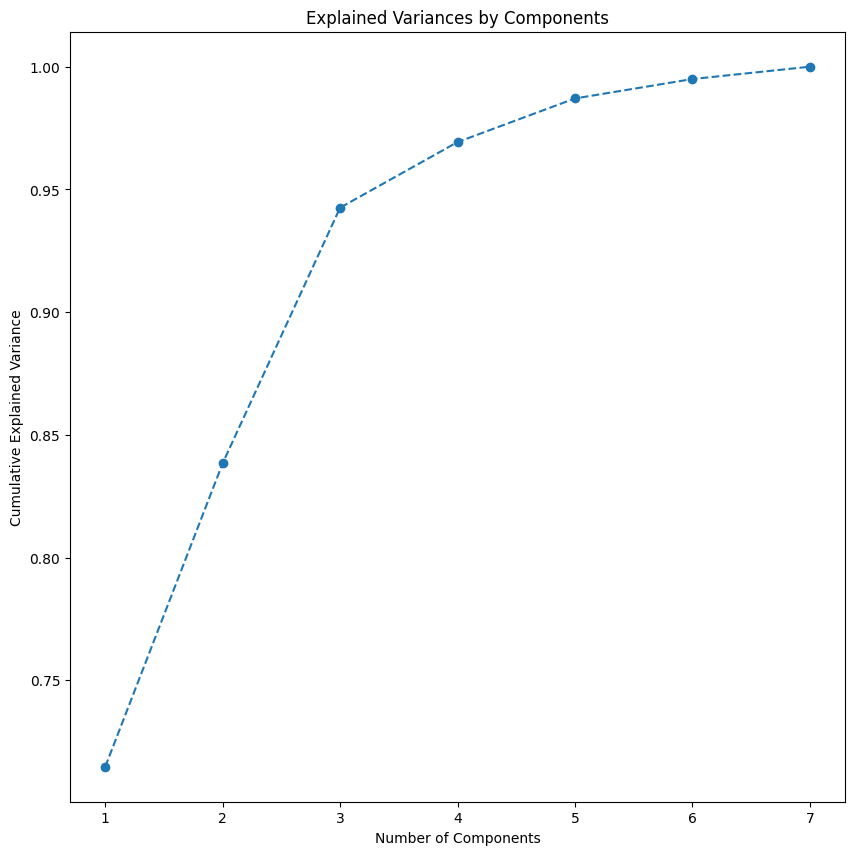

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:**

The first three principal components explain about 94% of the original variance. The scree plot shows that the eigenvalues start to form a straight line after the third principal component. If approximately 94% is a sufficient amount of variation explained in the data, then you should use the first three principal components.

In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


### **Question 4: Interpret the coefficients of the first three principal components from the below DataFrame (4 Marks)**

In [ ]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

<ipython-input-21-1be40fa76ea0>:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data_pca.T.style.applymap(color_high)


,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**

- The first principal component has large positive associations with Cylinders, Displacement, Horsepower, and Weight, as well as a large negative association with Mpg.  This signifies that this component primarily measures the vehicle's power and speed abilities.  However, this component may be associated to vehicles that are not as fuel efficient.
- The second component has a large negative association with Model Year, which suggests that this component is associated to the vehicle's age.
- Lastly, the third principal component has a large positive association with Acceleration, so this component primarily measures the amount of seconds the vehicle can go from 0 to 60 mph.

#### We can also visualize the data in 2 dimensions using the first two principal components

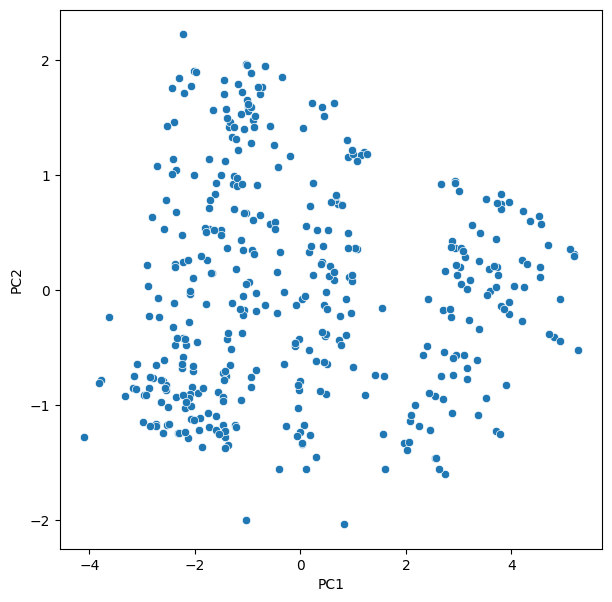

In [ ]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's try adding hue to the scatter plot**

### **Question 5:**

- **Create a scatter plot for the first two principal components with hue = 'cylinders' (2 Marks)**
- **Write your observations on the plot (2 Marks)**
- **Hint:** concatenate the DataFrames 'data_pca1' and 'data' on axis = 1

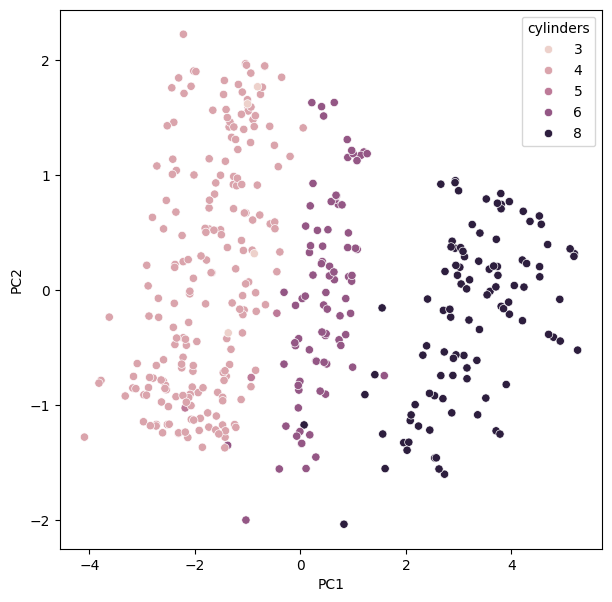

In [ ]:
df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

sns.scatterplot(x = df_concat[0], y = df_concat[1], data = df_concat, hue = 'cylinders')   # Create a scatter plot with x = 0 and y = 1 using df_concat dataframe

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Observations:**

As the vehicle's power and speed abilities increase, the number of cylinders seems to increase as well.  The vehicle's age doesn't seem to have a huge association to how many cylinders the vehicle has, although, there seems to be less vehicles with 8 cylinders than 3 or 4 cylinders the younger the vehicle is.

## t-SNE

### **Question 6:**
- **Apply the t-SNE embedding with 2 components for the DataFrame 'data_scaled' (use random_state = 1) (3 Marks)**
- **Write your observations (2 Marks)**   

In [ ]:
tsne = TSNE(n_components=2, random_state=1)           # Apply the t-SNE algorithm with random_state = 1

data_tsne = tsne.fit_transform(data_scaled)    # Fit and transform t-SNE function on the scaled data

In [ ]:
data_tsne.shape

(398, 2)

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
data_tsne.head()

,Component 1,Component 2
0,37.579971,2.138400
1,38.064915,0.073901
2,38.115463,1.203496
3,37.521984,1.321069
4,38.225060,1.684076


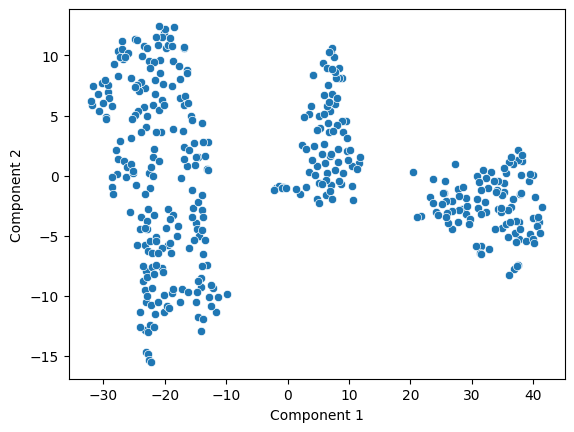

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

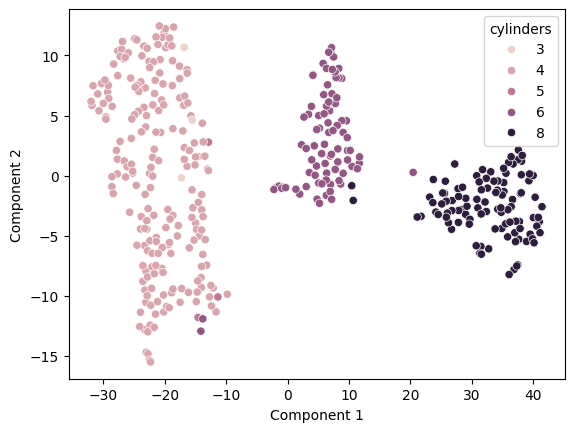

In [ ]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

**Observations:**

- The cluster with primarily 3 to 5 cylinders is associated with newer vehicles that are fast and get the most mpg.
- The cluster in the middle of the plot includes vehicles with primarily 6 cylinders that are moderately fast and get fairly good mpg.
- The last cluster which includes vehicles with 8 cylinders are older vehicles that might be slower than vehicles in the other two clusters.

In [ ]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']

    second_component = x['Component 2']

    if (first_component > 0) and (second_component > -5):
        return 'group_1'

    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'

    else:
        return 'group_3'

In [ ]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

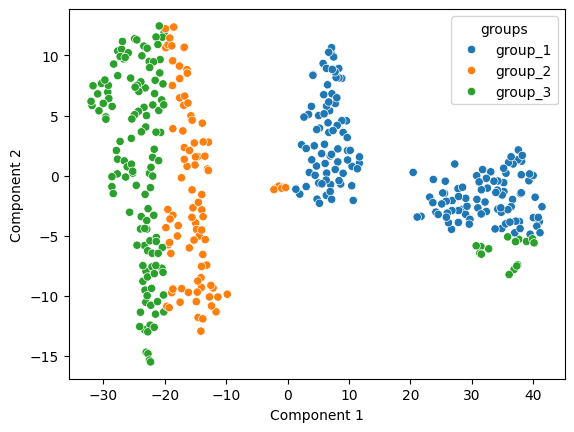

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [ ]:
data['groups'] = data_tsne['groups']

### **Question 7:**
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (3 Marks)**

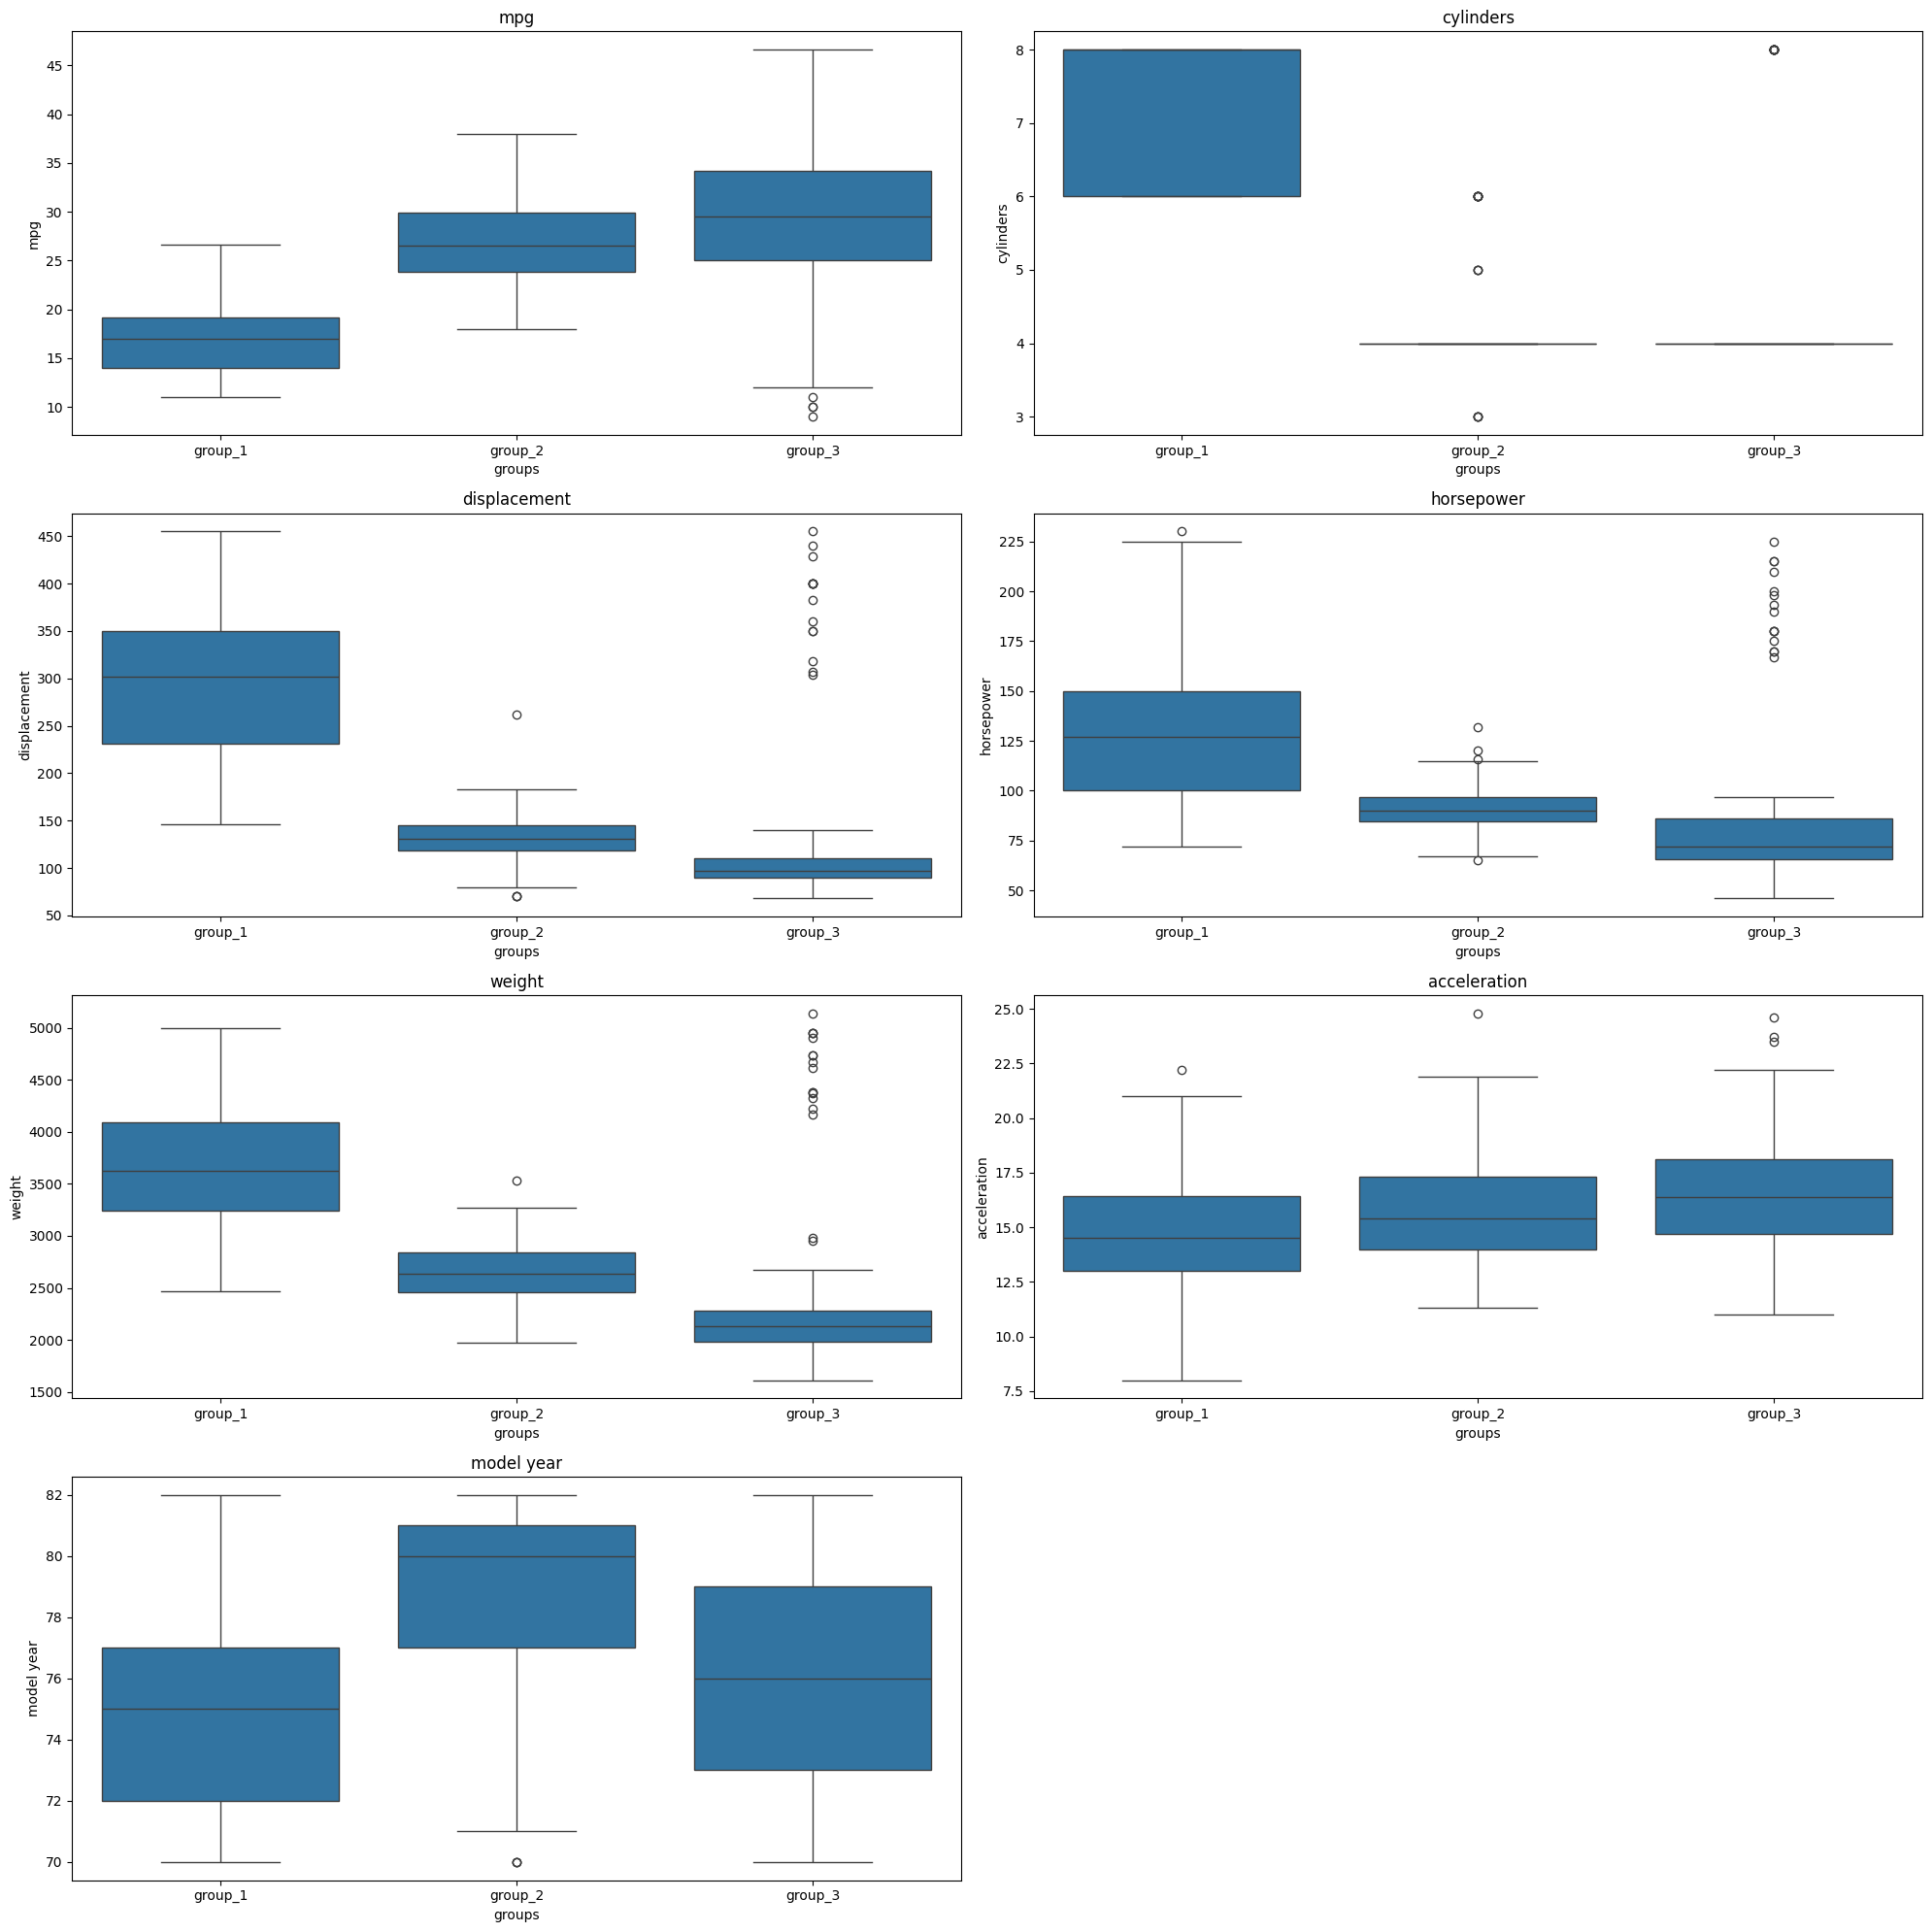

In [ ]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col):
    if i == 7:
        break

    plt.subplot(4, 2, i + 1)

    sns.boxplot(x=data['groups'], y=data[variable])      # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')

    plt.tight_layout()

    plt.title(variable)

plt.show()

**Observations:**

Group 1 and 2 seem to have the same range for model year.  Group 3 seems to consist of older vehicles.  Knowing this, it makes sense that group 3 has a lower mpg and acceleration and larger engine displacement, horsepower, and weight compared to the other two groups.  The older vehicles appear to be made with 8 cylinders.  Most newer vehicles have 4 to 6 cylinders, as displayed by group 1 and 2.  Since group 1 has primarily 4 cylinders, it makes sense that this group gets the most mpg and a lower engine displacement, horsepower, and weight.